In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/data/TMP_SIAP_pravi.xlsx"
import pandas as pd
documents_df = pd.DataFrame()
data = []
for i in range(1,11):
  df = pd.read_excel(path, str(i))
  data.extend(df.values.tolist())


In [ ]:
ds = [row[3] for row in data]


In [ ]:
ds[0]

'I want a fraction of patience and calmness that has @Cunnin6 while explains about the vaccine and viruses ...'

In [ ]:
!pip install emoji

import re
import emoji
from nltk.corpus import wordnet
import nltk
from gensim import corpora, models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
from nltk.stem import WordNetLemmatizer, SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def preprocess_data(text):
  try:
    text = re.sub('@\S+', '', text) #remove @user
    text = re.sub('https?://\S+', '', text) #remove links
    text = re.sub(r'([^\w\s,])', r'\1 ', text) #add space after emoji
    text = emoji.demojize(text) #replace emoji with word
    text = re.sub('[^a-zA-Z ]', '', text) #remove punctuation marks and special chars
    text = re.sub('\s+', ' ', text) #replace multiple spaces with one
    text = text.lower().strip() #to lower case and trim
  except Exception as e:
    return ""
  return text


def get_tokenized_text(text):
  final_words = []
  text = word_tokenize(text) #tokenize
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer(language='english')
  for word in text:
        if word not in stopwords.words('english'): #remove stopwords
            lemmatized_word = lemmatizer.lemmatize(word, get_wordnet_pos(word)) #lemmatize with part of speach tag
            stemmed_word = stemmer.stem(lemmatized_word)
            final_words.append(stemmed_word)
  return final_words

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def get_tokenized_corpus(text):
  preprocessed_text = preprocess_data(text)
  tokenized_text = get_tokenized_text(preprocessed_text)
  return tokenized_text

In [ ]:
ds_preprocessed = []

for i in range(len(ds)):
  ds_preprocessed.append(get_tokenized_corpus(ds[i]))

ds_preprocessed

In [ ]:
import csv
import pandas as pd
import numpy as np
import re
import emoji
from nltk.corpus import wordnet
import nltk
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
from nltk.stem import WordNetLemmatizer, SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
!pip install gensim==4.1.2

     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pickle

nmf = pickle.load(open("/content/drive/MyDrive/data/nmf_tfidf_042.p", "rb"))
dictionary = pickle.load(open("/content/drive/MyDrive/data/nmf_tfidf_dictionary_042.p", "rb"))


In [ ]:
ds_preprocessed

In [ ]:
from gensim.models import CoherenceModel, LdaModel, TfidfModel


In [ ]:
corpus = [dictionary.doc2bow(text) for text in ds_preprocessed]
topics = nmf[TfidfModel(dictionary=dictionary)[corpus]]

In [ ]:
topics[0]

[(0, 0.04637313693249122),
 (3, 0.5135068939735944),
 (4, 0.38709758552842116),
 (5, 0.049060404069442336)]

In [ ]:
pickle.dump(topics, open("/content/drive/MyDrive/data/nmf_topics.p", "wb"))

In [ ]:
topics_best_score = [sorted(t, key=lambda t: t[1]) for t in topics]


In [ ]:
topics_best_score

[[(0, 0.04455629278046053),
  (5, 0.047967889270429866),
  (4, 0.3858365902027376),
  (3, 0.5182370472535759)],
 [(2, 0.021248722233070935),
  (6, 0.021266139121996288),
  (3, 0.03160334724748825),
  (4, 0.07670279992832665),
  (1, 0.08779355035854998),
  (0, 0.1381618185295488),
  (7, 0.17265945953934456),
  (5, 0.45056416304167457)],
 [(6, 0.010197351657474384),
  (1, 0.010442395128220795),
  (2, 0.02460182045447623),
  (4, 0.04379385181619395),
  (0, 0.16294370328844746),
  (7, 0.19932008666988266),
  (5, 0.5487007909853046)],
 [(7, 0.035573958266249046),
  (5, 0.09598037523582148),
  (0, 0.13488391303150113),
  (2, 0.7285813649156004)],
 [(1, 0.02061925292564314),
  (5, 0.022708764708225627),
  (0, 0.1471681643478918),
  (4, 0.20377381499943273),
  (3, 0.28908098056661075),
  (7, 0.3061063417706773)],
 [(2, 0.01719537650834088),
  (3, 0.04265141377657902),
  (5, 0.05679930452948965),
  (7, 0.1212476589725947),
  (4, 0.16716522467737704),
  (1, 0.26871479947231647),
  (0, 0.32622622

In [ ]:
topics_for_docs = [tr[-1] if (len(tr) != 0) else None for tr in topics_best_score]
topics_for_docs

[(3, 0.5182370472535759),
 (5, 0.45056416304167457),
 (5, 0.5487007909853046),
 (2, 0.7285813649156004),
 (7, 0.3061063417706773),
 (0, 0.3262262220633021),
 (5, 0.44930692988955134),
 (4, 0.39897408685023217),
 (0, 0.9563483917538284),
 (6, 0.3364538719748063),
 (0, 0.3844099530948399),
 (0, 0.38605064752186696),
 (5, 0.5254649306423691),
 (0, 0.5043098479149294),
 (7, 0.4342766216597678),
 (4, 0.3271827949161969),
 (5, 0.4593886856630305),
 (5, 0.4126636436274181),
 (1, 0.4962375688418875),
 (1, 0.319670392111243),
 (3, 0.5283753977812604),
 (1, 0.729170211317464),
 (1, 0.4686268055078088),
 (1, 0.6287773067499248),
 (1, 0.3596912582443535),
 (4, 0.4979698050904365),
 (1, 0.6908988854463769),
 (3, 0.39065232479543643),
 (1, 0.2999587737602404),
 (4, 0.3641438240998615),
 (1, 0.41636615918308356),
 (4, 0.44551794280779095),
 (1, 0.40716932796599486),
 (3, 0.34481895695787645),
 (1, 0.724531418886257),
 (4, 0.46516770036113175),
 (1, 0.4595858550961873),
 (3, 0.37145390439059817),
 (7,

In [ ]:
#pickle.dump(topics_for_docs, open("/content/drive/MyDrive/data/nmf_topics_max_topic.p", "wb"))

In [ ]:
#topics_best_score = [sorted(t, key=lambda t: t[1]) for t in topics]
topics_list = [t[0] if t != None else None for t in topics_for_docs]

In [ ]:
topics_list_of_serial_numbers = []
for val in topics_list:
    if val != None :
        topics_list_of_serial_numbers.append(val)

topics_list_of_serial_numbers

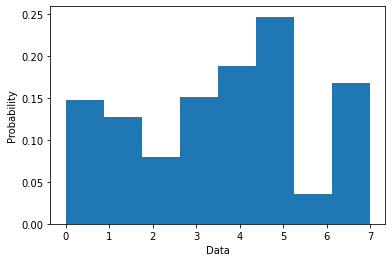

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(topics_list_of_serial_numbers, density=True, bins=8)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');


In [ ]:
map_topics = {
  0 : "Informativna	",
  1 : "Geopolitcka",
  2 : "Proizvodjaci",	
  3 : "Imunizacija",
  4 : "Odgovornost",	
  5 : "Prepricavanje",	
  6 : "Doze",
  7 : "Humor"
}

In [ ]:
topics_list_of_serial_numbers

In [ ]:
freq = [0, 0, 0, 0, 0, 0, 0, 0]

for t in topics_list_of_serial_numbers:
  freq[t] += 1

In [ ]:
freq

[12060, 10343, 6478, 12329, 15310, 20096, 2876, 13621]

In [ ]:
# id_tvita, tema, sentiment
#za svaku temu prikazao top 5 najreprezentativnijih tvitova
#lep grafik sa legendom za teme

In [ ]:


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [map_topics[i] for i in range(8)]
ax.bar(langs,freq)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
